## Tesla's Closing Stock Price

[*********************100%***********************]  1 of 1 completed




 Ticker         TSLA
count   2704.000000
mean     101.408960
std      108.304818
min        9.289333
25%       16.139500
50%       22.895000
75%      205.794163
max      409.970001 




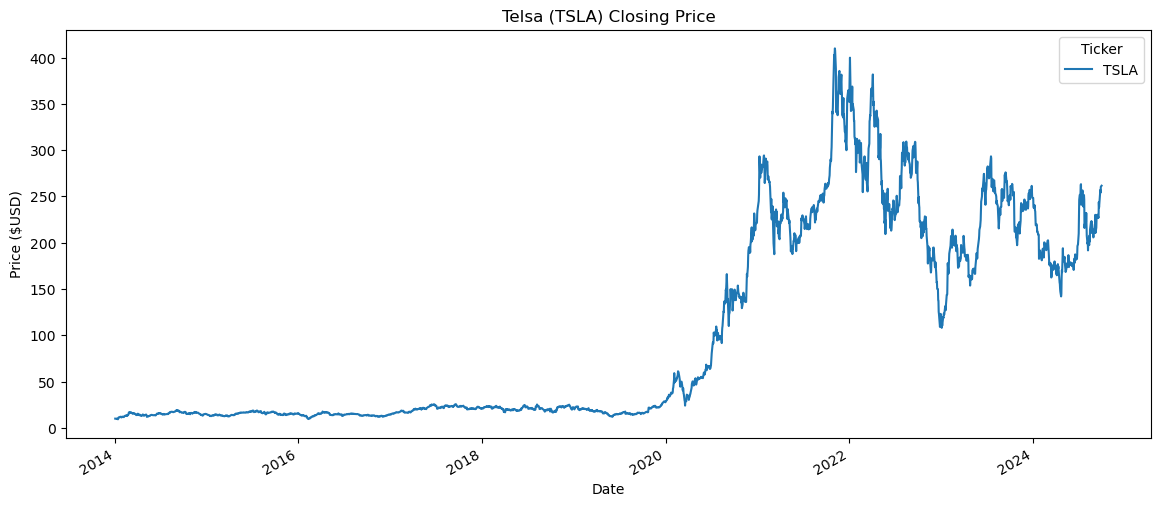

In [570]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import yfinance as yf
import warnings

#Ignore warnings
warnings.filterwarnings('ignore')


# Download historical stock data 
ticker = 'TSLA' 
df = yf.download(ticker, start='2014-01-01', end='2024-10-01')

#View the first 5 rows in the data set
print("\n\n",df["Close"].describe(), "\n\n")
# print("\n\n",df["Close"], "\n\n")


# Plot the closing price
df['Close'].plot(figsize=(14, 6))
plt.title(f'Telsa ({ticker}) Closing Price')
plt.xlabel('Date')
plt.ylabel('Price ($USD)')
plt.show()



In [544]:
x = df["Close"]
excel = pd.DataFrame(x)

# Convert the DataFrame to an Excel file
output = 'stock.xlsx'
x.to_excel(output, index=True, engine='openpyxl')

print(f"DataFrame has been written to {output}")

DataFrame has been written to stock.xlsx


## Checking for Outliers

In [569]:
270.75 +1.5*(84.92)

398.13

In [566]:
Q1 = df['Close'].quantile(0.25)
Q3 = df['Close'].quantile(0.75)

print(Q1, Q3)
# Calculate IQR
IQR = Q3 - Q1
print(IQR)


# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
print(lower_bound)
upper_bound = Q3 + 1.5 * IQR
print(upper_bound)
# Identify outliers
outliers = df[(df['Close'] < lower_bound) | (df['Close'] > upper_bound)]
print(outliers)


Ticker
TSLA    16.1395
Name: 0.25, dtype: float64 Ticker
TSLA    205.794163
Name: 0.75, dtype: float64
Ticker
TSLA    189.654663
dtype: float64
Ticker
TSLA   -268.342494
dtype: float64
Ticker
TSLA    490.276157
dtype: float64
Price      Adj Close Close High  Low Open Volume
Ticker          TSLA  TSLA TSLA TSLA TSLA   TSLA
Date                                            
2014-01-02       NaN   NaN  NaN  NaN  NaN    NaN
2014-01-03       NaN   NaN  NaN  NaN  NaN    NaN
2014-01-06       NaN   NaN  NaN  NaN  NaN    NaN
2014-01-07       NaN   NaN  NaN  NaN  NaN    NaN
2014-01-08       NaN   NaN  NaN  NaN  NaN    NaN
...              ...   ...  ...  ...  ...    ...
2024-09-24       NaN   NaN  NaN  NaN  NaN    NaN
2024-09-25       NaN   NaN  NaN  NaN  NaN    NaN
2024-09-26       NaN   NaN  NaN  NaN  NaN    NaN
2024-09-27       NaN   NaN  NaN  NaN  NaN    NaN
2024-09-30       NaN   NaN  NaN  NaN  NaN    NaN

[2704 rows x 6 columns]


## Volatility Calculator

In [571]:
closing_price = df["Close"].pct_change().dropna()

# Calculate daily volatility
daily_volatility = np.std(closing_price)

# Annualize volatility
annual_volatility = daily_volatility * np.sqrt(252)

print("Daily Volatility:", daily_volatility)
print("Annualized Volatility:", annual_volatility)

Daily Volatility: Ticker
TSLA    0.035137
dtype: float64
Annualized Volatility: Ticker
TSLA    0.557783
dtype: float64


In [562]:
(210/287)-1

-0.2682926829268293

In [546]:
205.79 + 1.5*(189.65)

490.265

In [548]:
185.83 - 1.5*(84.92)

58.45000000000002

In [549]:
270.75 + 1.5*(84.92)

398.13

[*********************100%***********************]  1 of 1 completed



 Price    Adj Close       Close        High         Low        Open  \
Ticker        TSLA        TSLA        TSLA        TSLA        TSLA   
count   187.000000  187.000000  187.000000  187.000000  187.000000   
mean    210.676096  210.676096  214.731711  205.845722  210.149947   
std      45.406774   45.406774   46.071510   45.277430   45.857690   
min     108.099998  108.099998  111.750000  101.809998  103.000000   
25%     180.494995  180.494995  183.805000  176.209999  178.590004   
50%     202.070007  202.070007  207.199997  197.199997  200.100006   
75%     253.985001  253.985001  258.660004  246.510002  251.334999   
max     293.339996  293.339996  299.290009  289.519989  296.040009   

Price         Volume  
Ticker          TSLA  
count   1.870000e+02  
mean    1.432866e+08  
std     3.799482e+07  
min     8.316600e+07  
25%     1.128452e+08  
50%     1.340476e+08  
75%     1.676031e+08  
max     3.065906e+08   




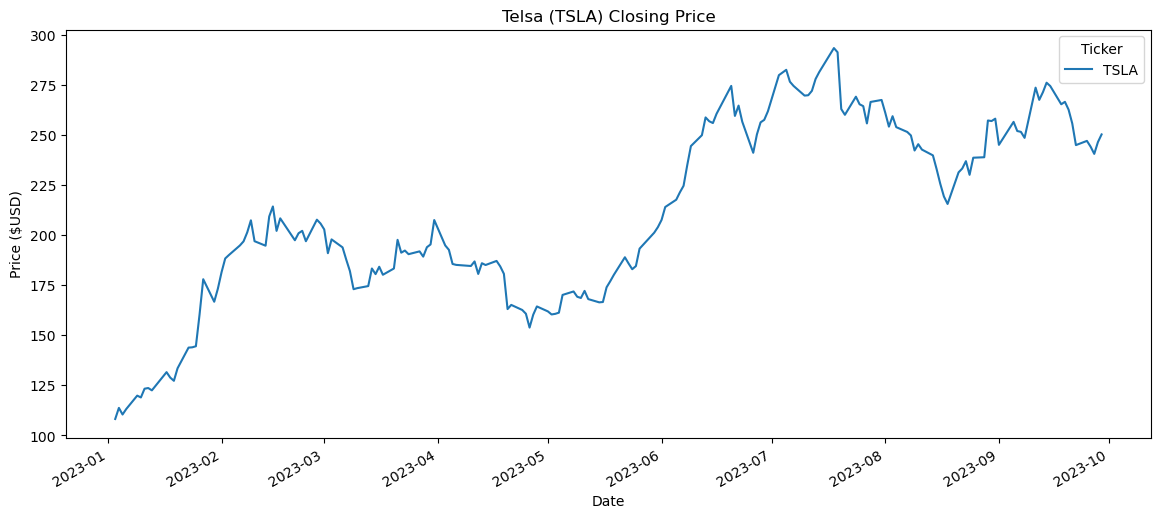

In [540]:
ticker = 'TSLA' 
data = yf.download(ticker, start='2023-01-01', end='2023-10-01')

#View the first 5 rows in the data set
print("\n\n",data.describe(), "\n\n")


# Plot the closing price
data['Close'].plot(figsize=(14, 6))
plt.title(f'Telsa ({ticker}) Closing Price')
plt.xlabel('Date')
plt.ylabel('Price ($USD)')
plt.show()



#  Tesla Forecasting using ARIMA

### The ARIMA model to forecast Tesla stock prices based on the AutoRegressive (AR), Integrated (I), and Moving Average (MA) components.

                               SARIMAX Results                                
Dep. Variable:                   TSLA   No. Observations:                 2704
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -8472.281
Date:                Sun, 01 Dec 2024   AIC                          16956.561
Time:                        01:38:56   BIC                          16991.974
Sample:                             0   HQIC                         16969.367
                               - 2704                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0315      0.011     -2.800      0.005      -0.054      -0.009
ar.L2          0.0137      0.010      1.378      0.168      -0.006       0.033
ar.L3          0.0026      0.012      0.212      0.8

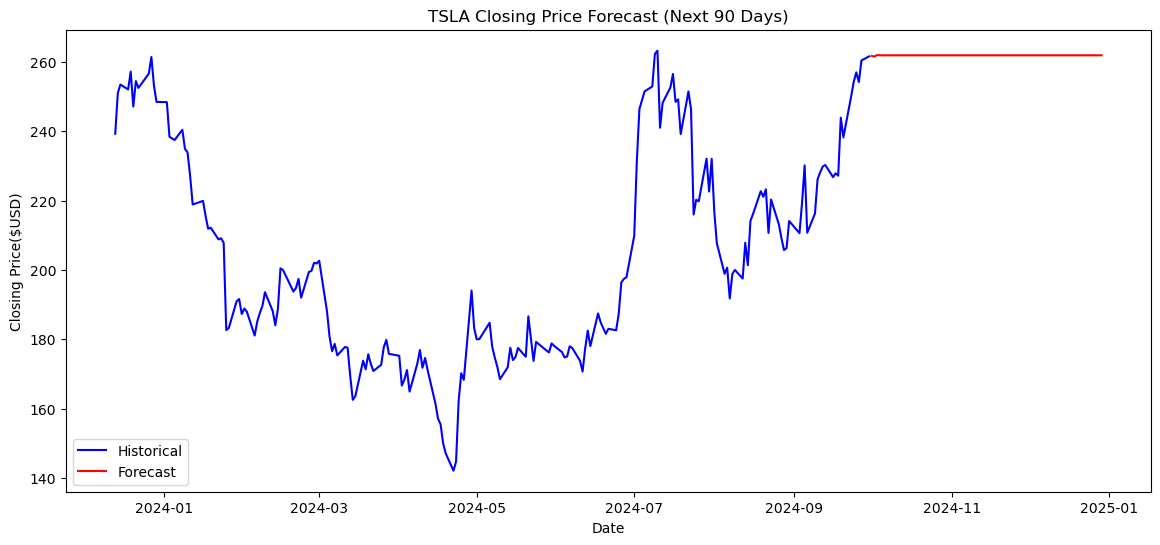

In [541]:
# Fit an ARIMA model

# ARIMA(p, d, q)
#p=5 This defines the number of lag observations included in the model. 
#d=1 This is the number of differencing steps needed to make the time series stationary. 
#q=0 This defines the number of lagged forecast errors used to predict future values.

model = ARIMA(df['Close'], order=(5, 1, 0))  # p=5, d=1, q=0
model_fit = model.fit()

# Print the summary of the fitted model
print(model_fit.summary())

# Forecast the next 90 business days
forecast = model_fit.forecast(steps=90)

# Create a date range for the forecast (90 business days)
forecast_dates = pd.date_range(df.index[-1] + pd.Timedelta(days=1), periods=90, freq='D')  # 'D' for business days

# Plot the forecast
plt.figure(figsize=(14, 6))
plt.plot(df.index[-200:], df['Close'].tail(200), label='Historical', color='blue')
plt.plot(forecast_dates, forecast, label='Forecast', color='red')
plt.title(f'{ticker} Closing Price Forecast (Next 90 Days)')
plt.xlabel('Date')
plt.ylabel('Closing Price($USD)')
plt.legend()
plt.show()

In [487]:
f'Predicted Stock Price with ARIMA: ${forecast.mean():.2f}'

'Predicted Stock Price with ARIMA: $263.60'

#  Tesla Forecasting using RandomForestRegressor 

[*********************100%***********************]  1 of 1 completed


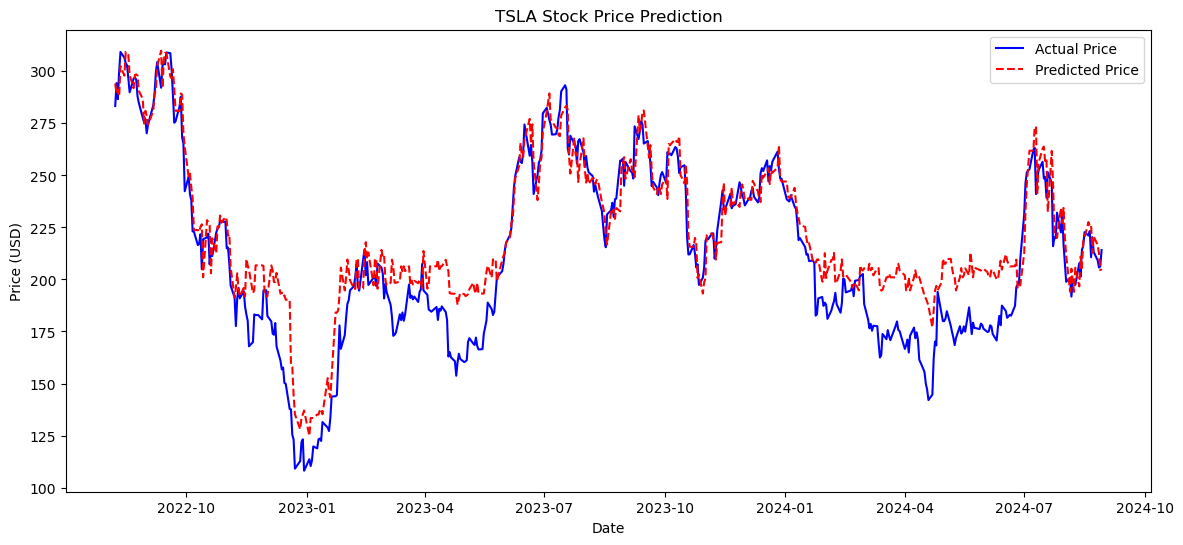

In [528]:
# Import packages for model predictions 
import statistics as stat
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Download stock data using yfinance
symbol = 'TSLA' 
start_date = '2014-01-01'
end_date = '2024-09-01'

# Download data using yfinance
df = yf.download(symbol, start=start_date, end=end_date)

# We'll use the previous day's close price to predict the next day's close price
# We can also use additional features like moving averages, etc.

# Calculate the moving average of the last 30 days
df['MA90'] = df['Close'].rolling(window=90).mean()

# Shift the closing prices to predict the next day's close price
df['Target'] = df['Close'].shift(-1)

# Drop missing values created by the rolling window and shifted target
df.dropna(inplace=True)

# Step 3: Feature Selection
# Use the 'Close' price and 'MA90' as features
features = ['Close', 'MA90']
X = df[features]  # Feature set
y = df['Target']  # Target variable (next day's closing price)

# Step 4: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Step 5: Train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 6: Make predictions
y_pred = model.predict(X_test)

# Step 7: Evaluate the model
# mse = mean_squared_error(y_test, y_pred)
# rmse = np.sqrt(mse)
# print(f'\nRoot Mean Squared Error: {rmse:.2f}\n\n')

# Plot the actual vs predicted prices
plt.figure(figsize=(14, 6))
plt.plot(y_test.index, y_test, label='Actual Price', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Price', color='red', linestyle='--')
plt.title(f'{symbol} Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


In [463]:
# summary = df["Close"].describe()
# print(summary)

In [491]:
f'Predicted Stock Price with RandomForestRegressor: ${y_pred.mean():.2f}'

'Predicted Stock Price with RandomForestRegressor: $222.77'

In [492]:
mean = 94.975593
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f"Mean Stock Price: ${mean:.2f}")
print(f"Mean absolute error: ${mae:.2f}")
print(f"Root mean squared error: ${rmse:.2f}")
print(f"Mean Absolute Percentage Error: {mape:.2f}%")

Mean Stock Price: $94.98
Mean absolute error: $13.77
Root mean squared error: $17.65
Mean Absolute Percentage Error: 7.51%


In [433]:
#f'{(rmse/mean*100):.2f} %'

### Tesla RFR Distribution Residual 

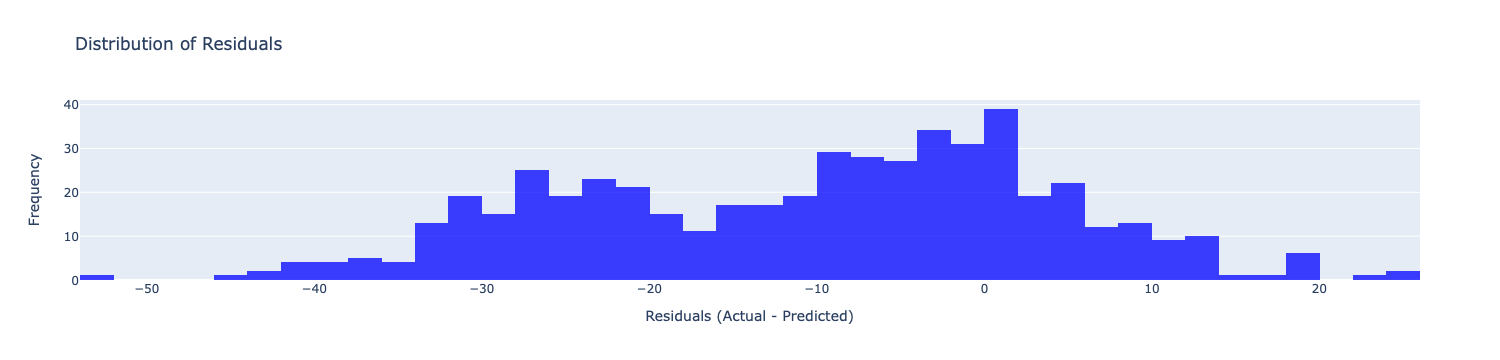

In [529]:
import plotly.graph_objects as go
residuals = y_test - y_pred

fig = go.Figure()
fig.add_trace(go.Histogram(x = residuals,
                           nbinsx = 50, 
                           marker_color = "blue",
                           opacity = 0.75))
fig.update_layout(title = "Distribution of Residuals",
                  xaxis_title = "Residuals (Actual - Predicted)",
                  yaxis_title = "Frequency")
fig.show()

# FORD MOTORS CLOSING STOCK PRICES


In [530]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# from statsmodels.tsa.arima.model import ARIMA
# import yfinance as yf
# import warnings
# warnings.simplefilter("ignore")

# # Download historical stock data (e.g., for Apple)
# ticker = 'F'  # Example: Apple stock
# df1 = yf.download(ticker, start='2014-01-01', end='2024-01-01')

# # Plot the closing price
# df1['Close'].plot(figsize=(14, 6))
# plt.title(f'Ford ({ticker}) Closing Price')
# plt.show()


# summary = df1["Close"].describe()
# print("\n", summary)

# # Fit an ARIMA model
# # ARIMA(p, d, q) with p=5, d=1, q=0 (you can experiment with different parameters)
# model = ARIMA(df1['Close'], order=(5, 1, 0))  # p=5, d=1, q=0
# model_fit = model.fit()

# # Print the summary of the fitted model
# print("\n", model_fit.summary(),"\n")

# # Forecast the next 360 business days
# forecast = model_fit.forecast(steps=90)

# # Create a date range for the forecast (360 business days)
# forecast_dates = pd.date_range(df.index[-1] + pd.Timedelta(days=1), periods=90, freq='B')  # 'B' for business days

# # Plot the forecast
# plt.figure(figsize=(14, 6))
# plt.plot(df1.index[-300:], df1['Close'].tail(300), label='Historical', color='blue')
# plt.plot(forecast_dates, forecast, label='Forecast', color='red')
# plt.title(f'Ford ({ticker})Closing Price Forecast (Next 120 Days)')
# plt.xlabel('Date')
# plt.ylabel('Closing Price')
# plt.legend()
# plt.show()


In [354]:
f'Predicted Stock Price with ARIMA: ${forecast.mean():.2f}'

'Predicted Stock Price with ARIMA: $12.18'

## Ford Forecasting using RandomForestRegressor

In [532]:

# # Import packages for model predictions 
# import statistics as stat
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_absolute_error, mean_squared_error
# import matplotlib.pyplot as plt

# # Download stock data using yfinance
# symbol = 'F' 
# start_date = '2014-01-01'
# end_date = '2024-01-01'
# # 
# # Download data using yfinance
# df1 = yf.download(symbol, start=start_date, end=end_date)
# # print(df.head())

# # We'll use the previous day's close price to predict the next day's close price
# # We can also use additional features like moving averages, etc.

# # Calculate the moving average of the last 30 days
# df1['MA30'] = df1['Close'].rolling(window=30).mean()

# # Shift the closing prices to predict the next day's close price
# df1['Target'] = df1['Close'].shift(-1)

# # Drop missing values created by the rolling window and shifted target
# df1.dropna(inplace=True)

# # Step 3: Feature Selection
# # Use the 'Close' price and 'MA10' as features
# features = ['Close', 'MA30']
# X = df1[features]  # Feature set
# y = df1['Target']  # Target variable (next day's closing price)

# # Step 4: Split data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# # Step 5: Train the Random Forest model
# model = RandomForestRegressor(n_estimators=100, random_state=42)
# model.fit(X_train, y_train)

# # Step 6: Make predictions
# y_pred = model.predict(X_test)

# # Step 7: Evaluate the model
# mse = mean_squared_error(y_test, y_pred)
# rmse = np.sqrt(mse)
# print(f'\nRoot Mean Squared Error: {rmse:.2f}\n\n')

# # Plot the actual vs predicted prices
# plt.figure(figsize=(14, 6))
# plt.plot(y_test.index, y_test, label='Actual Price', color='blue')
# plt.plot(y_test.index, y_pred, label='Predicted Price', color='red', linestyle='--')
# plt.title(f'{symbol} Stock Price Prediction')
# plt.xlabel('Date')
# plt.ylabel('Price (USD)')
# plt.legend()
# plt.show()

In [533]:
# # Evaluate model performance
# mean1 = 12.340576
# mae1 = mean_absolute_error(y_test, y_pred)
# rmse1 = np.sqrt(mean_squared_error(y_test, y_pred))
# mape1 = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# print(f"Mean Stock Price: ${mean1:.2f}")
# print(f"Mean absolute error: ${mae1:.2f}")
# print(f"Root mean squared error: ${rmse1:.2f}")
# print(f"Mean Absolute Percentage Error: {mape1:.2f}%")

In [534]:
# import plotly.graph_objects as go
# residuals = y_test - y_pred

# fig = go.Figure()
# fig.add_trace(go.Histogram(x = residuals,
#                            nbinsx = 50, 
#                            marker_color = "blue",
#                            opacity = 0.75))
# fig.update_layout(title = "Distribution of Residuals",
#                   xaxis_title = "Residuals (Actual - Predicted)",
#                   yaxis_title = "Frequency")
# fig.show()


## Ford VS Tesla

In [537]:
# import yfinance as yf
# import matplotlib.pyplot as plt

# # Download Ford (F) and Tesla (TSLA) stock data
# d1 = yf.download('TSLA', start='2023-01-01', end='2023-10-01')  # Ford data
# d2 = yf.download('TSLA', start='2024-01-01', end='2024-10-01')  # Tesla data
# d3 = yf.download('TSLA', start='2022-01-01', end='2022-10-01')  # Tesla data


# # Plotting the data
# test = d1["Close"]
# test2 = d2["Close"]
# test3 = d3["Close"]
# print(test.min(), test2.min(), test3.min())
# print(test.max(), test2.max(), test3.max())




# plt.figure(figsize=(16, 8))  # Set the size of the plot
# plt.plot(d1.index, d1["Close"], label='T23', color='blue')  # Plot Ford closing prices
# plt.plot(d2.index, d2["Close"], label='T24', color='red')  # Plot Tesla closing prices

# # Add titles and labels
# plt.title('Ford and Tesla Stock Prices (2014-2024)', fontsize=16)
# plt.xlabel('Date', fontsize=14)
# plt.ylabel('Price (USD)', fontsize=14)

# # Add a legend to distinguish between Ford and Tesla
# plt.legend()

# # Display the plot
# plt.show()


## Convert to Excel

In [538]:
test = df["Close"]
excel = pd.DataFrame(test)

# Convert the DataFrame to an Excel file
output = 'output.xlsx'
test.to_excel(output, index=True, engine='openpyxl')

print(f"DataFrame has been written to {output}")


DataFrame has been written to output.xlsx


## CRUDE OIL CLOSING STOCK PRICES


In [535]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# from statsmodels.tsa.arima.model import ARIMA
# import yfinance as yf

# # Download historical stock data (e.g., for Apple)
# ticker = 'CL=F'  # Example: Apple stock
# df2 = yf.download(ticker, start='2014-01-01', end='2024-01-01')

# # Plot the closing price
# df2['Close'].plot(figsize=(10, 6))
# plt.title(f'Crude Oil ({ticker}) Closing Price')
# plt.ylabel('Closing Price')
# plt.show()


# summary = df2["Close"].describe()
# print(summary)

# # Fit an ARIMA model
# # ARIMA(p, d, q) with p=5, d=1, q=0 (you can experiment with different parameters)
# model = ARIMA(df2['Close'], order=(5, 1, 0))  # p=5, d=1, q=0
# model_fit = model.fit()

# # Print the summary of the fitted model
# print(model_fit.summary())

# # Forecast the next 360 business days
# forecast = model_fit.forecast(steps=90)

# # Create a date range for the forecast (360 business days)
# forecast_dates = pd.date_range(df2.index[-1] + pd.Timedelta(days=1), periods=90, freq='B')  # 'B' for business days

# # Plot the forecast
# plt.figure(figsize=(12, 6))
# plt.plot(df2.index[-300:], df2['Close'].tail(300), label='Historical', color='blue')
# plt.plot(forecast_dates, forecast, label='Forecast', color='red')
# plt.title(f'{ticker} Closing Price Forecast (Next 120 Days)')
# plt.xlabel('Date')
# plt.ylabel('Closing Price')
# plt.legend()
# plt.show()


In [536]:
# df2.head()

# Lithium Stock Price

[*********************100%***********************]  1 of 1 completed


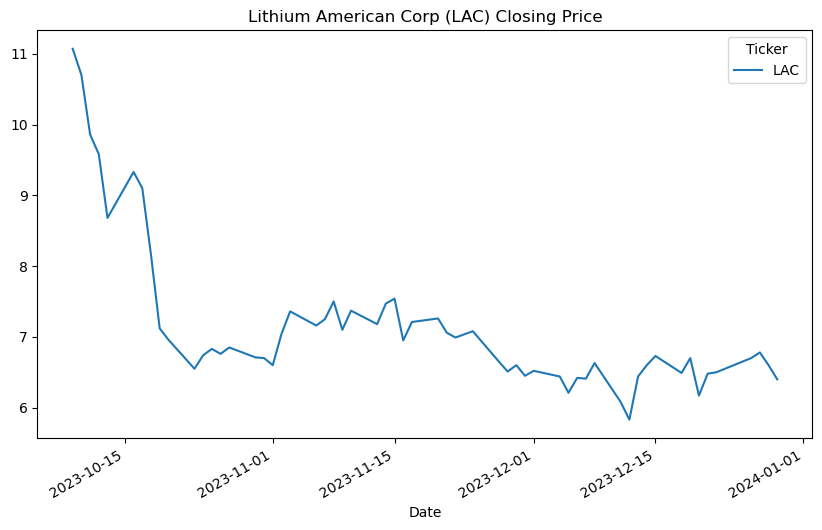

Ticker        LAC
count   58.000000
mean     7.157931
std      1.087891
min      5.830000
25%      6.527500
50%      6.770000
75%      7.240000
max     11.070000
                               SARIMAX Results                                
Dep. Variable:                    LAC   No. Observations:                   58
Model:                 ARIMA(5, 1, 0)   Log Likelihood                 -21.371
Date:                Mon, 25 Nov 2024   AIC                             54.743
Time:                        19:12:04   BIC                             67.001
Sample:                             0   HQIC                            59.507
                                 - 58                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0481      0.148      0.325     

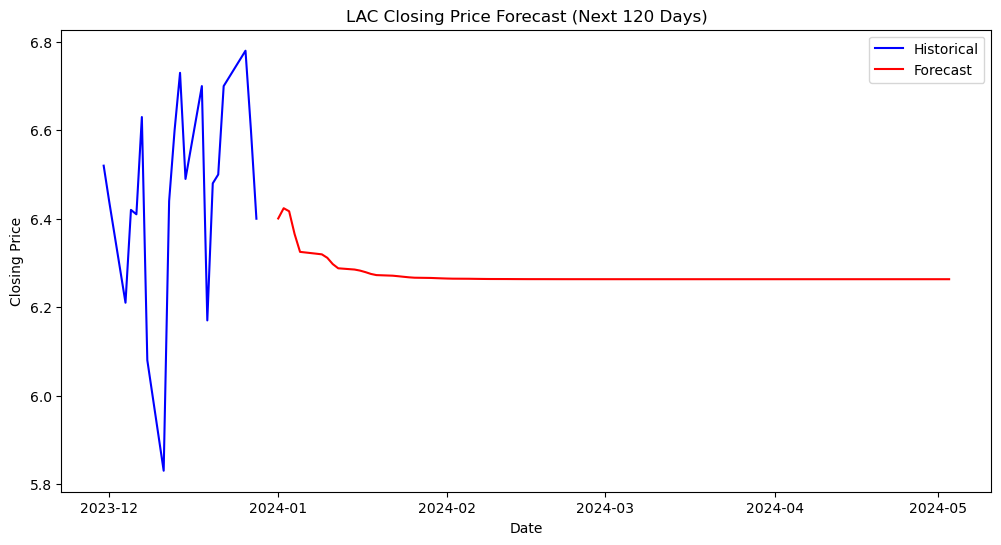

In [283]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import yfinance as yf

# Download historical stock data (e.g., for Apple)
ticker = 'LAC'  # Example: Apple stock
df4 = yf.download(ticker, start='2014-01-01', end='2024-01-01')

# Plot the closing price
df4['Close'].plot(figsize=(10, 6))
plt.title(f'Lithium American Corp ({ticker}) Closing Price')
plt.show()

summary = df4["Close"].describe()
print(summary)

# Fit an ARIMA model
# ARIMA(p, d, q) with p=5, d=1, q=0 (you can experiment with different parameters)
model = ARIMA(df4['Close'], order=(5, 1, 0))  # p=5, d=1, q=0
model_fit = model.fit()

# Print the summary of the fitted model
print(model_fit.summary())

# Forecast the next 360 business days
forecast = model_fit.forecast(steps=90)

# Create a date range for the forecast (360 business days)
forecast_dates = pd.date_range(df4.index[-1] + pd.Timedelta(days=1), periods=90, freq='B')  # 'B' for business days

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(df.index[-20:], df4['Close'].tail(20), label='Historical', color='blue')
plt.plot(forecast_dates, forecast, label='Forecast', color='red')
plt.title(f'{ticker} Closing Price Forecast (Next 120 Days)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


# Tesla Vs Big Oil

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


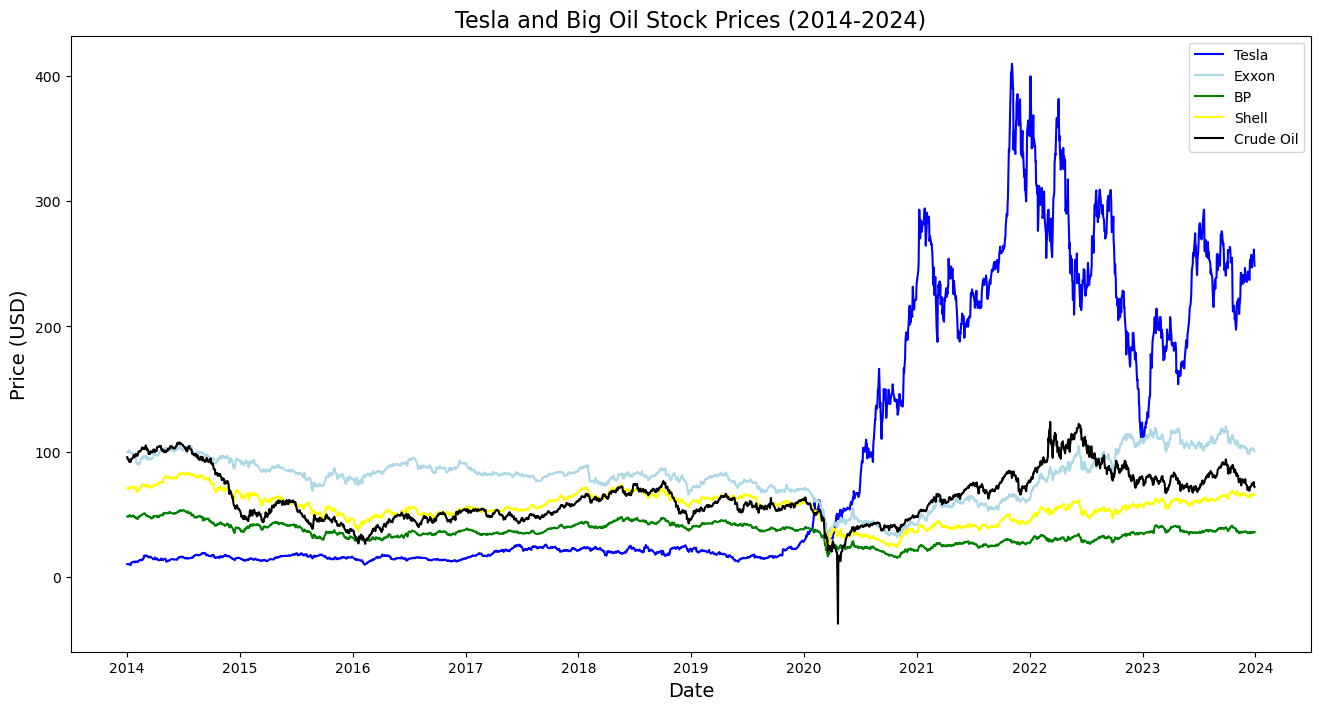

In [574]:
import yfinance as yf
import matplotlib.pyplot as plt

# Download Ford (F) and Tesla (TSLA) stock data
df = yf.download('TSLA', start='2014-01-01', end='2024-01-01')  # Ford data
df1 = yf.download('XOM', start='2014-01-01', end='2024-01-01')  # Tesla data
df2 = yf.download('BP', start='2014-01-01', end='2024-01-01')  # Tesla data
df3 = yf.download('SHEL', start='2014-01-01', end='2024-01-01')  # Tesla data
df4 = yf.download('CL=F', start='2014-01-01', end='2024-01-01')  # Tesla data






# Plotting the data
plt.figure(figsize=(16, 8))  # Set the size of the plot
plt.plot(df.index, df["Close"], label='Tesla', color='blue')  # Plot Ford closing prices
plt.plot(df1.index, df1["Close"], label='Exxon', color='lightblue')  # Plot Tesla closing prices
plt.plot(df2.index, df2["Close"], label='BP', color='green')  # Plot Tesla closing prices
plt.plot(df3.index, df3["Close"], label='Shell', color='yellow')  # Plot Tesla closing prices
plt.plot(df4.index, df4["Close"], label='Crude Oil', color='black')  # Plot Tesla closing prices





# Add titles and labels
plt.title('Tesla and Big Oil Stock Prices (2014-2024)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price (USD)', fontsize=14)

# Add a legend to distinguish between Ford and Tesla
plt.legend()

# Display the plot
plt.show()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


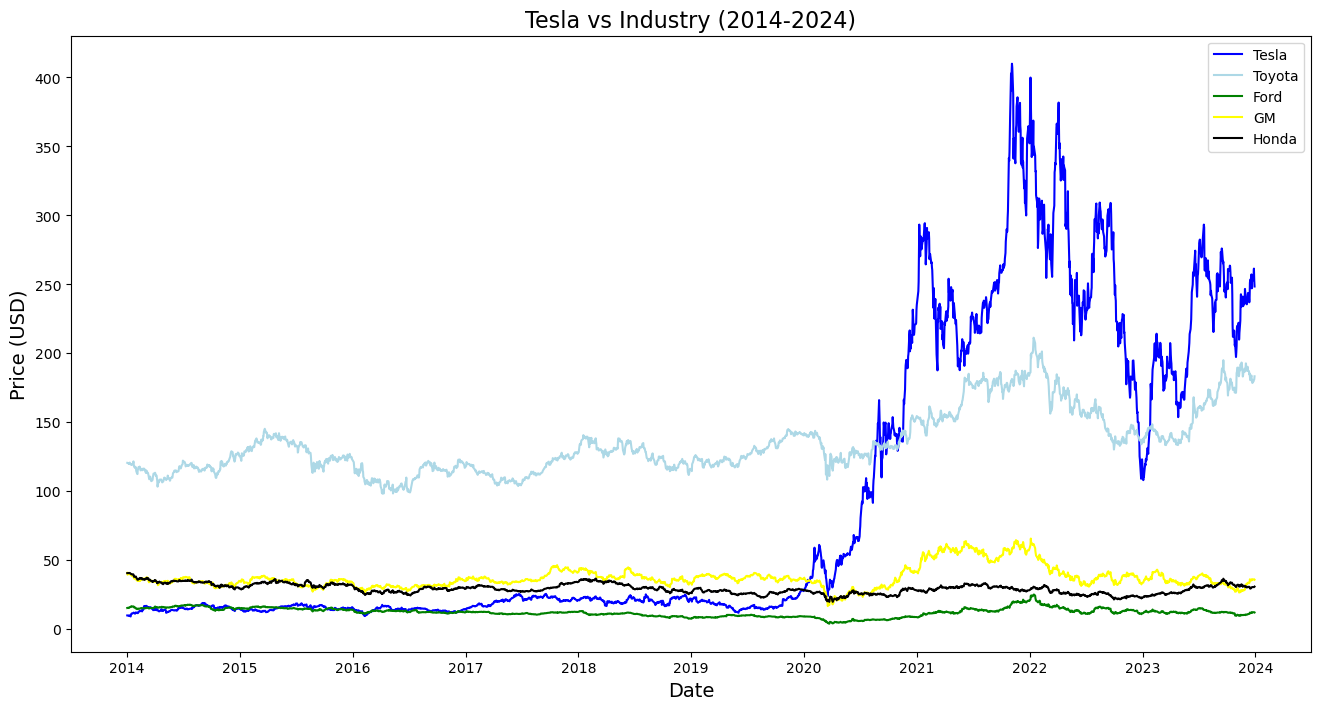

In [577]:
import yfinance as yf
import matplotlib.pyplot as plt

# Download Ford (F) and Tesla (TSLA) stock data
df = yf.download('TSLA', start='2014-01-01', end='2024-01-01')  # Ford data
df1 = yf.download('TM', start='2014-01-01', end='2024-01-01')  # Tesla data
df2 = yf.download('F', start='2014-01-01', end='2024-01-01')  # Tesla data
df3 = yf.download('GM', start='2014-01-01', end='2024-01-01')  # Tesla data
df4 = yf.download('HMC', start='2014-01-01', end='2024-01-01')  # Tesla data






# Plotting the data
plt.figure(figsize=(16, 8))  # Set the size of the plot
plt.plot(df.index, df["Close"], label='Tesla', color='blue')  # Plot Ford closing prices
plt.plot(df1.index, df1["Close"], label='Toyota', color='lightblue')  # Plot Tesla closing prices
plt.plot(df2.index, df2["Close"], label='Ford', color='green')  # Plot Tesla closing prices
plt.plot(df3.index, df3["Close"], label='GM', color='yellow')  # Plot Tesla closing prices
plt.plot(df4.index, df4["Close"], label='Honda', color='black')  # Plot Tesla closing prices





# Add titles and labels
plt.title('Tesla vs Industry (2014-2024)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price (USD)', fontsize=14)

# Add a legend to distinguish between Ford and Tesla
plt.legend()

# Display the plot
plt.show()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


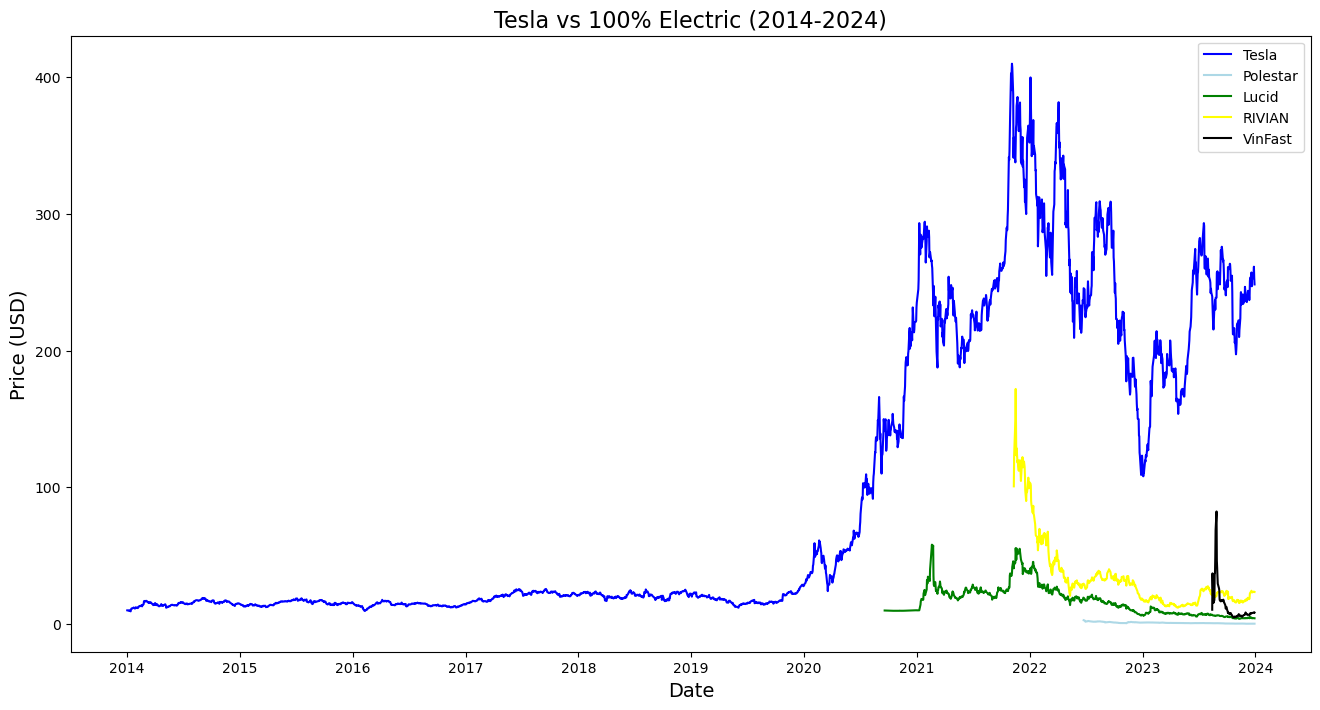

In [578]:
import yfinance as yf
import matplotlib.pyplot as plt

# Download Ford (F) and Tesla (TSLA) stock data
df = yf.download('TSLA', start='2014-01-01', end='2024-01-01')  # Ford data
df1 = yf.download('PSNYW', start='2014-01-01', end='2024-01-01')  # Tesla data
df2 = yf.download('LCID', start='2014-01-01', end='2024-01-01')  # Tesla data
df3 = yf.download('RIVN', start='2014-01-01', end='2024-01-01')  # Tesla data
df4 = yf.download('VFS', start='2014-01-01', end='2024-01-01')  # Tesla data






# Plotting the data
plt.figure(figsize=(16, 8))  # Set the size of the plot
plt.plot(df.index, df["Close"], label='Tesla', color='blue')  # Plot Ford closing prices
plt.plot(df1.index, df1["Close"], label='Polestar', color='lightblue')  # Plot Tesla closing prices
plt.plot(df2.index, df2["Close"], label='Lucid', color='green')  # Plot Tesla closing prices
plt.plot(df3.index, df3["Close"], label='RIVIAN', color='yellow')  # Plot Tesla closing prices
plt.plot(df4.index, df4["Close"], label='VinFast', color='black')  # Plot Tesla closing prices





# Add titles and labels
plt.title('Tesla vs 100% Electric (2014-2024)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price (USD)', fontsize=14)

# Add a legend to distinguish between Ford and Tesla
plt.legend()

# Display the plot
plt.show()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


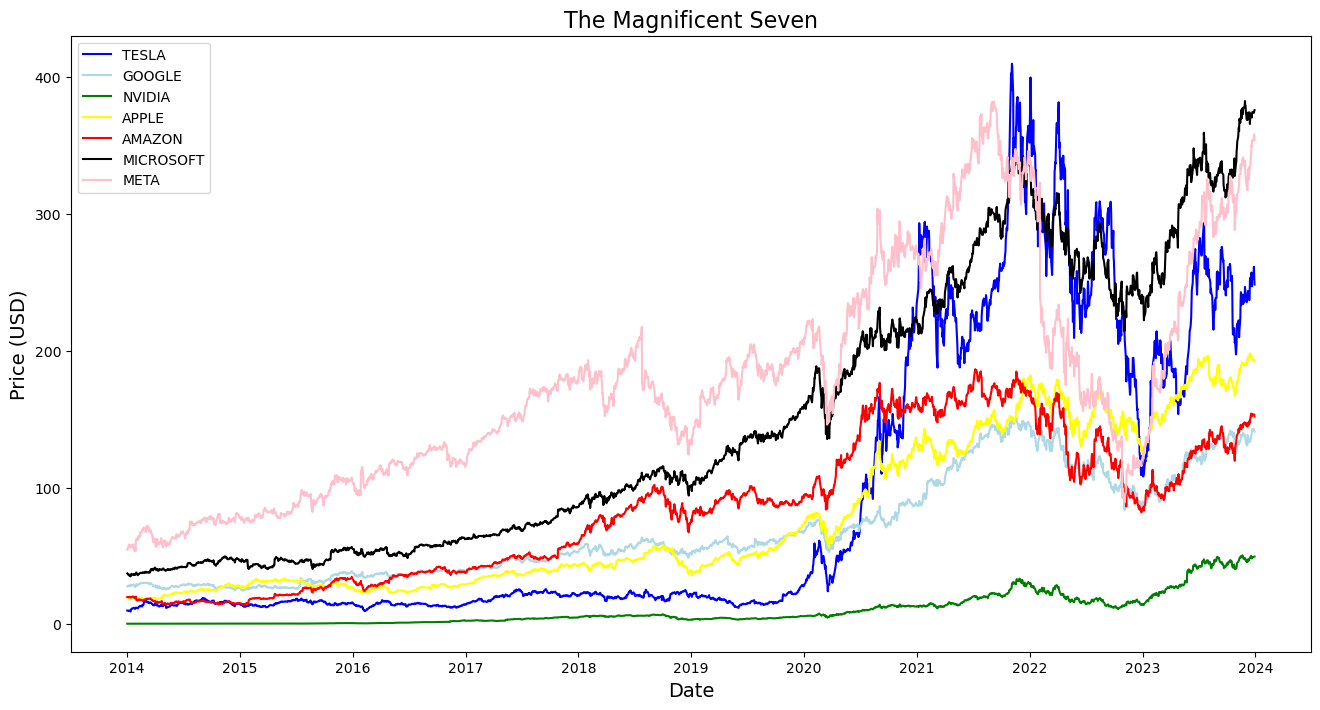

In [581]:
import yfinance as yf
import matplotlib.pyplot as plt

# Download Ford (F) and Tesla (TSLA) stock data
df = yf.download('TSLA', start='2014-01-01', end='2024-01-01')  # Ford data
df1 = yf.download('GOOG', start='2014-01-01', end='2024-01-01')  # Tesla data
df2 = yf.download('NVDA', start='2014-01-01', end='2024-01-01')  # Tesla data
df3 = yf.download('AAPL', start='2014-01-01', end='2024-01-01')  # Tesla data
df4 = yf.download('AMZN', start='2014-01-01', end='2024-01-01')  # Tesla data
df5 = yf.download('MSFT', start='2014-01-01', end='2024-01-01')  # Tesla data
df6 = yf.download('META', start='2014-01-01', end='2024-01-01')  # Tesla data








# Plotting the data
plt.figure(figsize=(16, 8))  # Set the size of the plot
plt.plot(df.index, df["Close"], label='TESLA', color='blue')  # Plot Ford closing prices
plt.plot(df1.index, df1["Close"], label='GOOGLE', color='lightblue')  # Plot Tesla closing prices
plt.plot(df2.index, df2["Close"], label='NVIDIA', color='green')  # Plot Tesla closing prices
plt.plot(df3.index, df3["Close"], label='APPLE', color='yellow')  # Plot Tesla closing prices
plt.plot(df4.index, df4["Close"], label='AMAZON', color='red')  
plt.plot(df5.index, df5["Close"], label='MICROSOFT', color='black')  
plt.plot(df6.index, df6["Close"], label='META', color='pink')  

# Plot Tesla closing prices





# Add titles and labels
plt.title('The Magnificent Seven', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price (USD)', fontsize=14)

# Add a legend to distinguish between Ford and Tesla
plt.legend()

# Display the plot
plt.show()


## RandomForestRegressor 2

In [8]:

import pandas as pd

file_path = 'output.xlsx'

# Read the Excel file into a DataFrame
df = pd.read_excel(file_path, engine='openpyxl')

# Display the first few rows of the DataFrame
print(df.head())

        Date       TSLA
0 2014-01-02  10.006667
1 2014-01-03   9.970667
2 2014-01-06   9.800000
3 2014-01-07   9.957333
4 2014-01-08  10.085333


In [10]:
df["Date"] = pd.to_datetime(df["Date"], format = "%Y-%m")
# df.columns = ["Date", "Closing Price"]
# df = df.sort_values(by = "Date").set_index("Date")


,Date,TSLA
0,2014-01-02,10.006667
1,2014-01-03,9.970667
2,2014-01-06,9.800000
3,2014-01-07,9.957333
4,2014-01-08,10.085333
...,...,...
2699,2024-09-24,254.270004
2700,2024-09-25,257.019989
2701,2024-09-26,254.220001
2702,2024-09-27,260.459991


In [14]:
# We want 12 months of lagged data 
lag_number = 7

# Create the lag features using a for loop
for lag in range(1, lag_number + 1):
    df[f"price_t-{lag}"] = df["TSLA"].shift(lag)
    
# Drop rows with NaN values 
df = df.dropna() 

# # Display data 
df.head()


,Date,TSLA,price_t-1,price_t-2,price_t-3,price_t-4,price_t-5,price_t-6,price_t-7,price_t-8,price_t-9,price_t-10,price_t-11,price_t-12
31,2014-02-18,13.580000,13.215333,13.308667,13.021333,13.108000,13.104000,12.435333,11.892000,11.628000,11.915333,11.807333,12.094000,12.189333
32,2014-02-19,12.909333,13.580000,13.215333,13.308667,13.021333,13.108000,13.104000,12.435333,11.892000,11.628000,11.915333,11.807333,12.094000
33,2014-02-20,13.998000,12.909333,13.580000,13.215333,13.308667,13.021333,13.108000,13.104000,12.435333,11.892000,11.628000,11.915333,11.807333
34,2014-02-21,13.973333,13.998000,12.909333,13.580000,13.215333,13.308667,13.021333,13.108000,13.104000,12.435333,11.892000,11.628000,11.915333
35,2014-02-24,14.510000,13.973333,13.998000,12.909333,13.580000,13.215333,13.308667,13.021333,13.108000,13.104000,12.435333,11.892000,11.628000


In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [27]:
# Input features and target variable definition 
X = df.drop(columns = ["TSLA"])
y = df["TSLA"]
df = df.sort_values(by = "Date").set_index("Date")

In [29]:
# We will use the last 24 months as the test set (last 1-2 years)
split_index = -12
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Initialize and train the model
model = RandomForestRegressor(random_state = 42)
model.fit(X_train, y_train)

# # Predict on the test set
# y_pred = model.predict(X_test)

# Evaluate model performance
# mae = mean_absolute_error(y_test, y_pred)
# rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# print(f"Mean absolute error: ${mae:.2f}")
# print(f"Root mean squared error: ${rmse:.2f}")


DTypePromotionError: The DType <class 'numpy.dtypes.DateTime64DType'> could not be promoted by <class 'numpy.dtypes.Float64DType'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtypes.DateTime64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>)